In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import MIDAS
import pandas as pd
import numpy as np
import time

A szimulációhoz ezt, a kódot írtam:
<br><br>
def simulate(self, params = [2.0, 0.5, 5.0], lag = 12, num = 500):<br>
&nbsp;&nbsp;y = np.zeros(num)<br>
&nbsp;&nbsp;x = np.exp(np.cumsum(np.random.normal(0.5, 2, num) / 100))<br>
&nbsp;&nbsp;alpha, beta, theta = params[0], params[1], params[2]<br>
        <br>
&nbsp;&nbsp;for i in range(num):<br>
&nbsp;&nbsp;&nbsp;if i < lag:<br>
&nbsp;&nbsp;&nbsp;&nbsp;# amíg i < lag-ig nem számolunk semmit, így y értékei az alpha-val lesznek egyenlőek<br>
&nbsp;&nbsp;&nbsp;&nbsp;y[i] = alpha<br>
&nbsp;&nbsp;&nbsp;else:<br>
&nbsp;&nbsp;&nbsp;&nbsp;# A reshape-elés szükséges, mert a súlyoknál még nem írtam át, hogy ha egy array-t kap akkor mit csináljon.<br>
&nbsp;&nbsp;&nbsp;&nbsp;# Mivel a weights.py-ban egy np.matmul-lal számolja ezt a .x_wegihted() függvényt, ahol a megfigyeléseinket egy<br>
&nbsp;&nbsp;&nbsp;&nbsp;# (1, lag) dimenziós mátrix, a súlyok meg egy (lag, 1) dimenziós mátrix, ezek szorzatából kapunk skalárt.<br>
&nbsp;&nbsp;&nbsp;&nbsp;# A [::-1] részhez azért van szükségünk, mert a megfigyeléseinket, úgy szeretnénk rendezni, hogy:<br>
&nbsp;&nbsp;&nbsp;&nbsp;# {i, i-1, i-2, ..., i - lag}<br>
&nbsp;&nbsp;&nbsp;&nbsp;y[i] = alpha + beta * Beta().x_weighted(x[i - lag : i][::-1].reshape((1, lag)), [1.0, theta])<br><br>
        
&nbsp;&nbsp;return x, y

In [8]:
alpha500, beta500, theta500 = [], [], []
runtime = []

model = MIDAS(lag = 12)
for i in range(1000):
    print('{}. RandomSeed'.format(i))
    np.random.seed(i)
    x, y = model.simulate()
    start = time.time()
    model.fit(['pos', 'pos', 'pos'], pd.DataFrame(x), y)
    tm = time.time() -  start
    print(tm, 'sec to run\n')
    alpha500.append(model.optimized_params[0])
    beta500.append(model.optimized_params[1])
    theta500.append(model.optimized_params[2])
    runtime.append(tm)

0. RandomSeed
Loglikelihood:  2.397303202229669 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.961306        0.099221      1.766836       2.155777
1    0.510158        0.014384      0.481965       0.538350
2    2.263966        4.793213     -7.130559      11.658491
1.0196740627288818 sec to run

1. RandomSeed
Loglikelihood:  2.1445081892334352 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977554        0.147339      1.688775       2.266332
1    0.502619        0.029297      0.445198       0.560041
2    4.327058        7.141737     -9.670490      18.324606
1.6058602333068848 sec to run

2. RandomSeed
Loglikelihood:  1.866941104568274 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.982083        0.032666      1.918058       2.046108
1    0.503768        0.004709      0.494538       0.512998
2    3.401021       12.369458    -20.842670      27.644713
1.1737780570983887 sec to run

3. RandomSeed
Loglikelihood:  2.0963784996722947

Loglikelihood:  1.9873788490128232 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977484        0.079015      1.822617       2.132352
1    0.504860        0.003618      0.497769       0.511951
2    3.252093        7.388374    -11.228853      17.733040
1.3783087730407715 sec to run

27. RandomSeed
Loglikelihood:  2.2870181016756224 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971684        0.121681      1.733194       2.210173
1    0.504987        0.025861      0.454300       0.555673
2    3.544044        6.272039     -8.748928      15.837015
1.888307809829712 sec to run

28. RandomSeed
Loglikelihood:  1.980846985311359 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.969443        0.219681      1.538875       2.400011
1    0.510922        0.062923      0.387594       0.634249
2    1.807720        0.457503      0.911032       2.704409
2.088721752166748 sec to run

29. RandomSeed
Loglikelihood:  2.1217019327306987 

   Parame

Loglikelihood:  2.15569097889826 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980787        0.080345      1.823313       2.138261
1    0.502765        0.004280      0.494375       0.511154
2    4.010627        5.627310     -7.018697      15.039952
1.5701863765716553 sec to run

53. RandomSeed
Loglikelihood:  2.0912247027333737 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972552        0.226358      1.528898       2.416206
1    0.506034        0.026828      0.453452       0.558617
2    3.099072        2.924256     -2.632364       8.830508
1.2938449382781982 sec to run

54. RandomSeed
Loglikelihood:  1.6064621196965645 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979045        0.123747      1.736506       2.221584
1    0.508161        0.037342      0.434973       0.581349
2    1.869739        1.926672     -1.906468       5.645946
1.5681722164154053 sec to run

55. RandomSeed
Loglikelihood:  1.8211153367058104 

   Param

Loglikelihood:  2.250834706620343 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976561        0.095880      1.788639       2.164483
1    0.502603        0.018923      0.465514       0.539691
2    4.396093       30.363176    -55.114638      63.906824
1.6851725578308105 sec to run

79. RandomSeed
Loglikelihood:  1.824339182017189 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974170        0.121404      1.736223       2.212118
1    0.505002        0.007088      0.491110       0.518895
2    3.584400        1.521974      0.601385       6.567415
1.3821043968200684 sec to run

80. RandomSeed
Loglikelihood:  2.3301765994873063 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977073        0.012188      1.953186       2.000960
1    0.501998        0.003363      0.495406       0.508589
2    4.454706       17.029340    -28.922187      37.831599
1.6288552284240723 sec to run

81. RandomSeed
Loglikelihood:  1.7441268147074105 

   Param

Loglikelihood:  1.9411342856261093 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972506        0.327985      1.329666       2.615346
1    0.510101        0.061008      0.390528       0.629674
2    2.205416        4.184888     -5.996814      10.407647
1.2556705474853516 sec to run

105. RandomSeed
Loglikelihood:  2.063773599412016 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980301        0.160536      1.665657       2.294946
1    0.502056        0.053405      0.397383       0.606729
2    4.393342       21.935614    -38.599670      47.386355
1.4469153881072998 sec to run

106. RandomSeed
Loglikelihood:  2.139073793779707 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974964        0.365618      1.258366       2.691562
1    0.507009        0.077174      0.355750       0.658268
2    2.734776        4.721554     -6.519299      11.988852
1.800377368927002 sec to run

107. RandomSeed
Loglikelihood:  1.927138958258002 

   Para

Loglikelihood:  1.929104775719028 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972216        0.206420      1.567641       2.376792
1    0.504554        0.015148      0.474865       0.534243
2    3.820281       18.475784    -32.391591      40.032153
1.7557520866394043 sec to run

131. RandomSeed
Loglikelihood:  2.159872370723605 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977938        0.114769      1.752996       2.202881
1    0.503573        0.013724      0.476675       0.530471
2    3.819355        6.586362     -9.089678      16.728388
1.6927525997161865 sec to run

132. RandomSeed
Loglikelihood:  2.3107240727947485 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978088        0.064747      1.851185       2.104990
1    0.503019        0.011481      0.480517       0.525521
2    4.143528        4.233033     -4.153064      12.440121
1.7113361358642578 sec to run

133. RandomSeed
Loglikelihood:  2.125271764595758 

   Par

Loglikelihood:  1.8962405037592966 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.982890        0.026291      1.931360       2.034421
1    0.505121        0.007660      0.490109       0.520133
2    2.454526        9.750758    -16.656608      21.565660
2.0230250358581543 sec to run

157. RandomSeed
Loglikelihood:  2.0818325434951324 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974699        0.269053      1.447365       2.502034
1    0.506280        0.061185      0.386359       0.626200
2    2.869020       14.959749    -26.451549      32.189588
1.6267657279968262 sec to run

158. RandomSeed
Loglikelihood:  2.4056242966128507 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.968656        0.071773      1.827984       2.109329
1    0.509292        0.026849      0.456669       0.561915
2    2.072041        1.528490     -0.923745       5.067826
1.770106554031372 sec to run

159. RandomSeed
Loglikelihood:  2.033947415641776 

   Pa

Loglikelihood:  2.2772338405384724 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978021        0.040113      1.899400       2.056641
1    0.503072        0.018395      0.467019       0.539124
2    3.957039       24.035070    -43.150832      51.064909
1.4649806022644043 sec to run

183. RandomSeed
Loglikelihood:  2.0902051418038092 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977274        0.226570      1.533206       2.421343
1    0.504509        0.049928      0.406652       0.602367
2    3.312886       31.039420    -57.523259      64.149030
2.1789448261260986 sec to run

184. RandomSeed
Loglikelihood:  2.1806319185715757 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975627        0.359396      1.271224       2.680030
1    0.503438        0.063561      0.378861       0.628014
2    3.929524       33.781425    -62.280852      70.139900
2.493802785873413 sec to run

185. RandomSeed
Loglikelihood:  2.100987278545187 

   Pa

Loglikelihood:  1.8685847304251875 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972914        0.011381      1.950607       1.995220
1    0.509220        0.005900      0.497656       0.520784
2    2.168634        2.461194     -2.655217       6.992486
1.7836847305297852 sec to run

209. RandomSeed
Loglikelihood:  2.3017384445547124 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974637        0.016670      1.941964       2.007310
1    0.503699        0.004499      0.494880       0.512517
2    4.079187        1.604122      0.935165       7.223209
1.7319598197937012 sec to run

210. RandomSeed
Loglikelihood:  1.8407950642151212 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.984852        0.400043      1.200783       2.768921
1    0.511639        0.010549      0.490964       0.532314
2    0.988526        0.296905      0.406603       1.570450
1.4360003471374512 sec to run

211. RandomSeed
Loglikelihood:  2.412940324698668 

   P

Loglikelihood:  1.9872819597793765 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.967735        0.319572      1.341386       2.594085
1    0.506298        0.054970      0.398559       0.614038
2    3.400843       21.627549    -38.988373      45.790059
2.26120924949646 sec to run

235. RandomSeed
Loglikelihood:  2.0884956281020512 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976782        0.131808      1.718442       2.235121
1    0.505206        0.022800      0.460519       0.549892
2    3.451924        2.710688     -1.860926       8.764774
1.4879817962646484 sec to run

236. RandomSeed
Loglikelihood:  2.2046740754957947 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972140        0.484240      1.023046       2.921234
1    0.508879        0.247797      0.023204       0.994553
2    2.525383       26.020613    -48.474082      53.524848
1.4150640964508057 sec to run

237. RandomSeed
Loglikelihood:  1.5276518931525747 

   Pa

Loglikelihood:  2.068910970907828 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975681        0.046921      1.883718       2.067644
1    0.504917        0.004699      0.495706       0.514128
2    3.087736        1.025865      1.077077       5.098395
3.974097728729248 sec to run

261. RandomSeed
Loglikelihood:  2.3184127156014314 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976273        0.009327      1.957992       1.994554
1    0.504762        0.003575      0.497755       0.511769
2    3.408747        2.163032     -0.830718       7.648211
1.8238861560821533 sec to run

262. RandomSeed
Loglikelihood:  1.8908859549905104 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.970198        0.478949      1.031475       2.908922
1    0.511592        0.134811      0.247367       0.775816
2    1.726717        5.588777     -9.227084      12.680518
4.169774770736694 sec to run

263. RandomSeed
Loglikelihood:  2.638891325230545 

   Para

Loglikelihood:  1.6319941175571975 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.970777        0.088085      1.798134       2.143420
1    0.513282        0.060651      0.394409       0.632155
2    1.590999        0.796533      0.029823       3.152176
1.3829355239868164 sec to run

287. RandomSeed
Loglikelihood:  2.1790414311068167 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974022        0.095150      1.787532       2.160513
1    0.504506        0.061299      0.384362       0.624650
2    4.104129       48.587083    -91.124804      99.333062
1.3451178073883057 sec to run

288. RandomSeed
Loglikelihood:  2.4167097342328305 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976029        0.066300      1.846083       2.105975
1    0.503293        0.009278      0.485108       0.521478
2    4.171674        2.260559     -0.258940       8.602288
1.3669681549072266 sec to run

289. RandomSeed
Loglikelihood:  2.0506974285302215 

   

Loglikelihood:  1.9575815846946407 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974389        0.229141      1.525281       2.423496
1    0.504236        0.037921      0.429912       0.578559
2    3.554840        4.431979     -5.131680      12.241359
1.204493761062622 sec to run

313. RandomSeed
Loglikelihood:  2.1583523424024045 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975659        0.209299      1.565440       2.385878
1    0.504666        0.049639      0.407375       0.601957
2    3.692063       36.255697    -67.367796      74.751923
1.1560468673706055 sec to run

314. RandomSeed
Loglikelihood:  2.225186536258474 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974702        0.057466      1.862070       2.087333
1    0.503617        0.007458      0.488999       0.518234
2    4.143286       11.455629    -18.309335      26.595907
1.336670160293579 sec to run

315. RandomSeed
Loglikelihood:  1.6493481155813834 

   Par

Loglikelihood:  1.8537198843070357 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977518        0.206185      1.573402       2.381634
1    0.504700        0.047503      0.411595       0.597805
2    3.331194       28.231718    -52.001957      58.664345
1.3479390144348145 sec to run

339. RandomSeed
Loglikelihood:  0.8618557411957259 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.982810        0.191330      1.607810       2.357810
1    0.516444        0.005313      0.506031       0.526858
2    0.834676        0.464502     -0.075730       1.745083
1.188920021057129 sec to run

340. RandomSeed
Loglikelihood:  1.1012247240750574 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.963229        0.046645      1.871807       2.054651
1    0.526694        0.042005      0.444366       0.609023
2    0.914020        0.740051     -0.536453       2.364493
0.9508473873138428 sec to run

341. RandomSeed
Loglikelihood:  1.8892088855559543 

   P

Loglikelihood:  2.0929044365098846 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974280        0.020114      1.934857       2.013703
1    0.504766        0.005850      0.493300       0.516232
2    3.642226        4.038688     -4.273457      11.557908
1.326148509979248 sec to run

365. RandomSeed
Loglikelihood:  2.076220714431081 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971538        0.078840      1.817013       2.126062
1    0.509357        0.041073      0.428856       0.589858
2    2.389072        0.627932      1.158349       3.619796
1.1447422504425049 sec to run

366. RandomSeed
Loglikelihood:  2.0352632721438804 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980649        0.019563      1.942307       2.018992
1    0.503472        0.009835      0.484196       0.522749
2    3.702785       14.633133    -24.977629      32.383198
1.2846848964691162 sec to run

367. RandomSeed
Loglikelihood:  1.727720620107379 

   Par

Loglikelihood:  2.3221879146318485 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978318        0.260368      1.468005       2.488630
1    0.503261        0.045837      0.413422       0.593100
2    3.722210        7.812900    -11.590793      19.035214
1.403254747390747 sec to run

391. RandomSeed
Loglikelihood:  2.2153634147879573 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977454        0.096170      1.788963       2.165944
1    0.503909        0.009725      0.484848       0.522969
2    3.471186        7.206777    -10.653837      17.596209
1.9120049476623535 sec to run

392. RandomSeed
Loglikelihood:  1.9255025122417146 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972600        0.105684      1.765463       2.179737
1    0.514878        0.030864      0.454385       0.575371
2    1.055478        0.640034     -0.198965       2.309921
1.2468793392181396 sec to run

393. RandomSeed
Loglikelihood:  1.5880160356833943 

   P

Loglikelihood:  1.9107984294484797 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977878        0.574344      0.852184       3.103572
1    0.502512        0.065638      0.373863       0.631160
2    4.279448       42.013800    -78.066086      86.624983
1.3351855278015137 sec to run

417. RandomSeed
Loglikelihood:  1.837997207219329 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980744        0.592762      0.818952       3.142537
1    0.503945        0.130687      0.247802       0.760087
2    3.542975       25.597007    -46.626237      53.712188
1.3501217365264893 sec to run

418. RandomSeed
Loglikelihood:  1.7755926874634966 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978022        0.269538      1.449737       2.506307
1    0.508055        0.050802      0.408485       0.607625
2    2.159795        4.408924     -6.481537      10.801127
1.2350990772247314 sec to run

419. RandomSeed
Loglikelihood:  1.918796868656925 

   Pa

Loglikelihood:  1.9174246331135651 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972416        0.020830      1.931590       2.013241
1    0.508934        0.004826      0.499475       0.518393
2    2.708469        0.689592      1.356893       4.060045
1.1555407047271729 sec to run

443. RandomSeed
Loglikelihood:  1.9750018491178216 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978839        0.009679      1.959868       1.997810
1    0.505503        0.003563      0.498520       0.512486
2    2.945652        4.010802     -4.915376      10.806680
1.106935739517212 sec to run

444. RandomSeed
Loglikelihood:  2.2402255271138074 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976334        0.016375      1.944239       2.008429
1    0.504457        0.005976      0.492744       0.516170
2    3.762172        4.131645     -4.335703      11.860048
1.3291325569152832 sec to run

445. RandomSeed
Loglikelihood:  2.157273098827829 

   Pa

Loglikelihood:  1.624616988300474 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.985046        0.044670      1.897494       2.072597
1    0.512587        0.043952      0.426443       0.598731
2    0.985671        0.865698     -0.711065       2.682408
0.9879360198974609 sec to run

469. RandomSeed
Loglikelihood:  1.9000755905840359 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981526        0.016096      1.949980       2.013073
1    0.504938        0.003087      0.498888       0.510988
2    2.850272        8.010014    -12.849066      18.549611
1.365971565246582 sec to run

470. RandomSeed
Loglikelihood:  2.1712038501435873 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978072        0.026013      1.927087       2.029056
1    0.507129        0.016658      0.474480       0.539777
2    2.215512        1.019464      0.217399       4.213624
1.2669291496276855 sec to run

471. RandomSeed
Loglikelihood:  1.5782128056201854 

   Pa

Loglikelihood:  2.1624021877844894 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971577        0.010723      1.950561       1.992593
1    0.506900        0.003855      0.499344       0.514455
2    2.956149        1.073693      0.851750       5.060548
1.4415843486785889 sec to run

495. RandomSeed
Loglikelihood:  2.457393971610968 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.963337        0.049446      1.866426       2.060249
1    0.508192        0.002481      0.503329       0.513056
2    3.094003        5.521141     -7.727234      13.915239
1.2351877689361572 sec to run

496. RandomSeed
Loglikelihood:  2.2986158196344664 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.969560        0.010609      1.948767       1.990354
1    0.505381        0.002076      0.501313       0.509449
2    3.340241        2.277695     -1.123960       7.804442
1.2526357173919678 sec to run

497. RandomSeed
Loglikelihood:  1.692620652899353 

   Pa

Loglikelihood:  1.909902313568304 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976890        0.024844      1.928197       2.025583
1    0.503905        0.006078      0.491993       0.515817
2    3.809753        1.334656      1.193875       6.425630
1.3908026218414307 sec to run

521. RandomSeed
Loglikelihood:  1.846736653840113 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.970881        0.012338      1.946700       1.995062
1    0.511056        0.012683      0.486198       0.535913
2    1.957030        0.991574      0.013580       3.900481
1.197251558303833 sec to run

522. RandomSeed
Loglikelihood:  1.6127026254621248 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990303        0.013094      1.964639       2.015967
1    0.507390        0.003541      0.500449       0.514330
2    0.998224        0.091086      0.819699       1.176750
1.4301905632019043 sec to run

523. RandomSeed
Loglikelihood:  2.0107107285979313 

   Par

Loglikelihood:  2.38742063521998 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975689        0.340613      1.308100       2.643279
1    0.503275        0.021033      0.462052       0.544498
2    3.659445       12.221669    -20.294586      27.613476
1.4380600452423096 sec to run

547. RandomSeed
Loglikelihood:  1.9994023420199591 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981227        0.311104      1.371474       2.590980
1    0.503937        0.002241      0.499544       0.508329
2    3.379049        2.505862     -1.532351       8.290449
1.195932388305664 sec to run

548. RandomSeed
Loglikelihood:  2.0454670629439287 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975425        0.043109      1.890933       2.059916
1    0.501659        0.006564      0.488793       0.514524
2    4.773485        3.150500     -1.401382      10.948352
1.4480931758880615 sec to run

549. RandomSeed
Loglikelihood:  2.031977374177663 

   Para

Loglikelihood:  1.84564909473717 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977095        0.043470      1.891895       2.062296
1    0.504220        0.011159      0.482348       0.526091
2    3.739006       23.505883    -42.331678      49.809690
1.347839593887329 sec to run

573. RandomSeed
Loglikelihood:  2.2963427501553255 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.982270        0.196208      1.597709       2.366831
1    0.501468        0.014171      0.473694       0.529243
2    4.510946        1.923626      0.740709       8.281182
1.1267778873443604 sec to run

574. RandomSeed
Loglikelihood:  2.098307417041055 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977113        0.014780      1.948145       2.006080
1    0.506271        0.001967      0.502416       0.510126
2    3.095423        3.041535     -2.865876       9.056721
1.2339398860931396 sec to run

575. RandomSeed
Loglikelihood:  2.1203468318963687 

   Para

Loglikelihood:  2.085140897835886 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971140        0.248176      1.484725       2.457555
1    0.507365        0.021912      0.464419       0.550312
2    2.723929        4.104099     -5.319957      10.767815
1.2219150066375732 sec to run

599. RandomSeed
Loglikelihood:  1.341276576584014 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.968458        0.077431      1.816697       2.120219
1    0.520364        0.026273      0.468870       0.571857
2    0.899940        0.054886      0.792365       1.007515
1.0600409507751465 sec to run

600. RandomSeed
Loglikelihood:  1.3416707405879835 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.985576        0.193901      1.605538       2.365615
1    0.510926        0.045053      0.422623       0.599229
2    0.918897        0.039229      0.842008       0.995785
1.2496988773345947 sec to run

601. RandomSeed
Loglikelihood:  1.585685007101199 

   Par

Loglikelihood:  1.4271404444920712 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.983957        0.102783      1.782507       2.185408
1    0.511784        0.021511      0.469623       0.553944
2    0.942493        0.254277      0.444120       1.440866
1.2691259384155273 sec to run

625. RandomSeed
Loglikelihood:  1.6787881604290045 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978469        0.015292      1.948498       2.008440
1    0.510911        0.009522      0.492248       0.529575
2    1.754769        0.310588      1.146027       2.363511
1.334716558456421 sec to run

626. RandomSeed
Loglikelihood:  2.139889805322515 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980565        0.089446      1.805253       2.155876
1    0.505492        0.007711      0.490379       0.520605
2    2.455384        9.222028    -15.619457      20.530226
1.2360234260559082 sec to run

627. RandomSeed
Loglikelihood:  1.9648020753434214 

   Pa

Loglikelihood:  2.383264633485132 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972741        0.076755      1.822303       2.123178
1    0.505474        0.018867      0.468495       0.542453
2    3.134084        1.330931      0.525507       5.742662
1.147627592086792 sec to run

651. RandomSeed
Loglikelihood:  2.1645158625796004 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977991        0.010895      1.956637       1.999346
1    0.504069        0.005514      0.493261       0.514877
2    3.538304        4.073086     -4.444799      11.521406
1.1319599151611328 sec to run

652. RandomSeed
Loglikelihood:  1.885106939908028 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981357        0.112261      1.761328       2.201385
1    0.504366        0.009138      0.486456       0.522276
2    3.254352        9.957976    -16.262922      22.771626
1.1467921733856201 sec to run

653. RandomSeed
Loglikelihood:  1.9194726956659527 

   Par

Loglikelihood:  2.0536737747178835 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981764        0.049562      1.884624       2.078904
1    0.503737        0.006674      0.490656       0.516819
2    3.344785        8.010982    -12.356452      19.046022
1.1851389408111572 sec to run

677. RandomSeed
Loglikelihood:  1.8029261817587257 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.970751        0.058916      1.855278       2.086224
1    0.508983        0.003123      0.502862       0.515104
2    2.248212        4.560980     -6.691144      11.187569
1.1169304847717285 sec to run

678. RandomSeed
Loglikelihood:  2.6315205301963758 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977120        0.209766      1.565985       2.388255
1    0.501911        0.031291      0.440582       0.563241
2    4.517266        9.608492    -14.315032      23.349563
1.2909431457519531 sec to run

679. RandomSeed
Loglikelihood:  2.121777383296484 

   P

Loglikelihood:  2.0211318145381463 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.972309        0.433260      1.123135       2.821483
1    0.505291        0.067857      0.372293       0.638288
2    3.332826       16.723705    -29.445034      36.110686
1.1815333366394043 sec to run

703. RandomSeed
Loglikelihood:  2.1841039653588243 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978105        0.270705      1.447533       2.508678
1    0.504132        0.059438      0.387636       0.620628
2    3.542906       14.459872    -24.797923      31.883735
1.1651620864868164 sec to run

704. RandomSeed
Loglikelihood:  1.950714188175834 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979558        0.008252      1.963384       1.995731
1    0.502998        0.003391      0.496352       0.509644
2    4.099350        4.358718     -4.443580      12.642279
1.451017141342163 sec to run

705. RandomSeed
Loglikelihood:  2.125887333792007 

   Par

Loglikelihood:  1.9191333404208708 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980506        0.008959      1.962946       1.998066
1    0.503806        0.002333      0.499235       0.508378
2    3.498895        4.986088     -6.273657      13.271447
1.1989171504974365 sec to run

729. RandomSeed
Loglikelihood:  2.0489983711102067 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979845        0.130574      1.723925       2.235765
1    0.508829        0.038305      0.433753       0.583905
2    1.578243        1.527946     -1.416477       4.572963
1.2179114818572998 sec to run

730. RandomSeed
Loglikelihood:  1.764475291886737 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980045        0.453005      1.092172       2.867918
1    0.502368        0.064583      0.375788       0.628949
2    4.324879       39.515227    -73.123542      81.773301
1.3196048736572266 sec to run

731. RandomSeed
Loglikelihood:  1.6682729282700797 

   P

Loglikelihood:  2.1018818778273687 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.951279        0.368016      1.229982       2.672577
1    0.514067        0.103870      0.310485       0.717649
2    2.329364        4.235709     -5.972473      10.631201
1.2323331832885742 sec to run

755. RandomSeed
Loglikelihood:  2.349563240989449 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979875        0.009171      1.961900       1.997849
1    0.503218        0.006642      0.490200       0.516236
2    3.839293        8.969209    -13.740034      21.418619
1.390714168548584 sec to run

756. RandomSeed
Loglikelihood:  1.7793349157907892 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971561        0.256723      1.468393       2.474729
1    0.512793        0.116825      0.283820       0.741765
2    2.209431       16.388956    -29.912333      34.331194
1.1178958415985107 sec to run

757. RandomSeed
Loglikelihood:  2.2040766395045748 

   Pa

Loglikelihood:  2.116416360097818 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.974818        0.012500      1.950319       1.999318
1    0.508364        0.002024      0.504398       0.512330
2    2.477836        5.187256     -7.688999      12.644670
1.229623556137085 sec to run

781. RandomSeed
Loglikelihood:  2.587056241804619 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976123        0.603942      0.792417       3.159828
1    0.502147        0.014190      0.474335       0.529959
2    4.443558       45.510140    -84.754677      93.641793
1.3101744651794434 sec to run

782. RandomSeed
Loglikelihood:  2.3653856287112873 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.973370        0.042236      1.890590       2.056150
1    0.503414        0.001264      0.500937       0.505891
2    4.128003       12.423856    -20.222308      28.478314
1.5882182121276855 sec to run

783. RandomSeed
Loglikelihood:  2.1242286261010297 

   Par

Loglikelihood:  2.0754184736743073 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979548        0.196885      1.593660       2.365436
1    0.502148        0.020221      0.462515       0.541781
2    4.440287       22.027204    -38.732239      47.612813
1.2423095703125 sec to run

807. RandomSeed
Loglikelihood:  2.0324281360233973 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978067        0.106192      1.769934       2.186200
1    0.503700        0.010257      0.483597       0.523803
2    3.793342        8.549709    -12.963781      20.550464
1.2946879863739014 sec to run

808. RandomSeed
Loglikelihood:  2.166726806180094 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979363        0.510841      0.978133       2.980593
1    0.503170        0.075246      0.355690       0.650650
2    3.989715       17.568333    -30.443586      38.423015
1.1120579242706299 sec to run

809. RandomSeed
Loglikelihood:  1.9815716529034564 

   Para

Loglikelihood:  2.3045932211743434 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981852        0.021845      1.939037       2.024668
1    0.505186        0.005798      0.493821       0.516550
2    2.410611        0.675705      1.086253       3.734968
1.3522372245788574 sec to run

833. RandomSeed
Loglikelihood:  1.9171146923670475 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976867        0.048010      1.882769       2.070965
1    0.506654        0.006244      0.494417       0.518892
2    2.068883        0.436254      1.213842       2.923924
1.2735557556152344 sec to run

834. RandomSeed
Loglikelihood:  2.0254805140049625 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979987        0.008687      1.962961       1.997014
1    0.503594        0.001290      0.501066       0.506122
2    3.659130        1.486324      0.745988       6.572271
1.4369118213653564 sec to run

835. RandomSeed
Loglikelihood:  2.021002681919748 

   P

Loglikelihood:  2.0464151773099033 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.980491        0.070300      1.842705       2.118277
1    0.500966        0.003481      0.494143       0.507789
2    4.851525        2.130828      0.675179       9.027871
1.5422675609588623 sec to run

859. RandomSeed
Loglikelihood:  1.0329672975664674 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.966410        0.333999      1.311783       2.621037
1    0.526293        0.104920      0.320653       0.731932
2    0.874448        0.257908      0.368957       1.379938
1.0573112964630127 sec to run

860. RandomSeed
Loglikelihood:  1.6928411391118698 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.971565        0.340110      1.304961       2.638169
1    0.516568        0.074803      0.369958       0.663179
2    0.991704        0.156521      0.684928       1.298480
1.0980894565582275 sec to run

861. RandomSeed
Loglikelihood:  1.722782116492089 

   P

Loglikelihood:  2.265186915184108 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975562        0.048672      1.880165       2.070958
1    0.504757        0.019387      0.466759       0.542755
2    3.547939       21.507385    -38.605761      45.701639
1.2712714672088623 sec to run

885. RandomSeed
Loglikelihood:  2.0685189817580585 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977123        0.031075      1.916218       2.038028
1    0.502771        0.004042      0.494849       0.510693
2    4.267772        4.801434     -5.142866      13.678409
1.4030394554138184 sec to run

886. RandomSeed
Loglikelihood:  2.3062631810424645 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979475        0.320889      1.350544       2.608407
1    0.501883        0.035270      0.432755       0.571011
2    4.589055       42.540381    -78.788559      87.966669
1.3642463684082031 sec to run

887. RandomSeed
Loglikelihood:  2.0699160070868676 

   P

Loglikelihood:  2.342680744808832 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.982318        0.106982      1.772638       2.191998
1    0.501027        0.013900      0.473784       0.528270
2    4.754548       37.429721    -68.606358      78.115453
2.305510997772217 sec to run

911. RandomSeed
Loglikelihood:  1.9833092681632931 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.964110        0.390822      1.198112       2.730108
1    0.510263        0.007334      0.495889       0.524637
2    2.559795       15.210477    -27.252193      32.371783
1.4088852405548096 sec to run

912. RandomSeed
Loglikelihood:  1.54732071009671 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.968462        0.316054      1.349006       2.587917
1    0.524261        0.058201      0.410188       0.638333
2    0.934086        0.073648      0.789738       1.078433
1.0801522731781006 sec to run

913. RandomSeed
Loglikelihood:  1.3892681250985714 

   Para

Loglikelihood:  2.3591951472954444 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.970321        0.010133      1.950461       1.990181
1    0.504545        0.001447      0.501708       0.507382
2    3.649740        2.630478     -1.505902       8.805382
1.273202657699585 sec to run

937. RandomSeed
Loglikelihood:  2.0353216845810667 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.977922        0.054062      1.871962       2.083881
1    0.504548        0.003034      0.498602       0.510493
2    3.277081       14.607386    -25.352870      31.907032
1.3440630435943604 sec to run

938. RandomSeed
Loglikelihood:  1.8321011441991686 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.975330        0.119742      1.740640       2.210019
1    0.506213        0.004444      0.497503       0.514923
2    2.979148       10.485930    -17.572897      23.531192
1.2511532306671143 sec to run

939. RandomSeed
Loglikelihood:  1.8226782842653686 

   P

Loglikelihood:  2.08325998455399 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.978991        0.153568      1.678002       2.279979
1    0.503323        0.016524      0.470937       0.535710
2    3.792690        7.569926    -11.044093      18.629472
1.3383584022521973 sec to run

963. RandomSeed
Loglikelihood:  2.3191926010473285 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.973400        0.311568      1.362738       2.584063
1    0.505496        0.070472      0.367373       0.643619
2    3.055044        8.384278    -13.377839      19.487926
1.3107259273529053 sec to run

964. RandomSeed
Loglikelihood:  2.0150837975751728 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.979857        0.048898      1.884018       2.075696
1    0.504395        0.021140      0.462962       0.545829
2    2.979894        2.727402     -2.365715       8.325504
1.451890230178833 sec to run

965. RandomSeed
Loglikelihood:  2.257539576087593 

   Para

Loglikelihood:  1.9816615772490147 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981956        0.024450      1.934035       2.029878
1    0.505082        0.015892      0.473935       0.536229
2    3.122467       24.749328    -45.385325      51.630259
1.2856910228729248 sec to run

989. RandomSeed
Loglikelihood:  2.2798487765944437 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.976258        0.126436      1.728449       2.224068
1    0.502612        0.003683      0.495394       0.509830
2    4.277062       63.609201   -120.394682     128.948806
1.3160324096679688 sec to run

990. RandomSeed
Loglikelihood:  1.7633620312649905 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.981203        0.022579      1.936950       2.025457
1    0.509032        0.047378      0.416172       0.601891
2    1.711153        5.727329     -9.514206      12.936512
1.4832468032836914 sec to run

991. RandomSeed
Loglikelihood:  2.1021915438459318 

   

In [9]:
alpha1000, beta1000, theta1000 = [], [], []
runtime1000 = []

for i in range(1000):
    print('{}. RandomSeed'.format(i))
    np.random.seed(i)
    x, y = model.simulate(num = 1000)
    start = time.time()
    model.fit(['pos', 'pos', 'pos'], pd.DataFrame(x), y)
    tm = time.time() -  start
    print(tm, 'sec to run\n')
    alpha1000.append(model.optimized_params[0])
    beta1000.append(model.optimized_params[1])
    theta1000.append(model.optimized_params[2])
    runtime1000.append(tm)

0. RandomSeed
Loglikelihood:  2.82335976658689 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.987434        0.196714      1.601883       2.372986
1    0.500810        0.002176      0.496545       0.505076
2    4.730442        2.278280      0.265095       9.195790
1.7017385959625244 sec to run

1. RandomSeed
Loglikelihood:  2.250286701257748 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992577        0.009080      1.974781       2.010372
1    0.500045        0.000102      0.499846       0.500245
2    4.996928        0.224772      4.556384       5.437473
1.4148955345153809 sec to run

2. RandomSeed
Loglikelihood:  1.9946283031083196 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990646        0.232056      1.535825       2.445467
1    0.500411        0.010396      0.480035       0.520787
2    4.882420       20.156421    -34.623440      44.388280
1.4129741191864014 sec to run

3. RandomSeed
Loglikelihood:  2.289499291648127 


Loglikelihood:  2.1685326824927293 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992352        0.003283      1.985917       1.998787
1    0.500109        0.000077      0.499957       0.500261
2    4.985376        0.348712      4.301914       5.668838
1.945328712463379 sec to run

27. RandomSeed
Loglikelihood:  2.486015093922222 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991270        0.448440      1.112344       2.870196
1    0.500151        0.019194      0.462531       0.537770
2    4.980814       40.621298    -74.635467      84.597094
1.975865125656128 sec to run

28. RandomSeed
Loglikelihood:  2.4274559745596487 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991245        0.005922      1.979637       2.002852
1    0.500268        0.000145      0.499983       0.500553
2    4.932989        0.840767      3.285116       6.580861
1.9532356262207031 sec to run

29. RandomSeed
Loglikelihood:  2.4268059420966734 

   Parame

Loglikelihood:  2.262965309660361 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990801        0.097824      1.799069       2.182533
1    0.500112        0.004967      0.490377       0.509848
2    4.993470       32.818152    -59.328926      69.315866
1.306875228881836 sec to run

53. RandomSeed
Loglikelihood:  2.314430194276193 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991853        0.094102      1.807417       2.176289
1    0.500174        0.001230      0.497763       0.502586
2    4.956770        7.048284     -8.857614      18.771153
1.361187219619751 sec to run

54. RandomSeed
Loglikelihood:  1.9299925640818612 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992743        0.132347      1.733348       2.252137
1    0.500157        0.002897      0.494479       0.505836
2    4.972772        7.867433    -10.447112      20.392657
1.631777286529541 sec to run

55. RandomSeed
Loglikelihood:  2.0375528021845706 

   Paramete

Loglikelihood:  2.3547523515230937 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991456        0.104027      1.787566       2.195345
1    0.500113        0.001093      0.497972       0.502255
2    4.991683        6.346839     -7.447892      17.431258
1.386765480041504 sec to run

79. RandomSeed
Loglikelihood:  1.9832762016378287 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992716        0.850449      0.325866       3.659566
1    0.500061        0.003976      0.492268       0.507855
2    4.993183       35.049212    -63.702010      73.688376
1.3417387008666992 sec to run

80. RandomSeed
Loglikelihood:  2.436838465247306 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992629        0.346447      1.313605       2.671652
1    0.500039        0.000144      0.499757       0.500320
2    4.996314        1.765882      1.535248       8.457380
1.3249235153198242 sec to run

81. RandomSeed
Loglikelihood:  1.8916163868322269 

   Param

Loglikelihood:  2.2861547144401846 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992828        0.023046      1.947658       2.037998
1    0.500075        0.000442      0.499208       0.500942
2    4.994549        1.308540      2.429859       7.559239
1.5480067729949951 sec to run

105. RandomSeed
Loglikelihood:  2.1447612383305157 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991398        0.179567      1.639453       2.343342
1    0.500130        0.000375      0.499395       0.500864
2    4.976104       13.225557    -20.945510      30.897719
1.5698950290679932 sec to run

106. RandomSeed
Loglikelihood:  2.4111608050919107 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992065        0.097689      1.800598       2.183532
1    0.500096        0.002348      0.495493       0.504699
2    4.989576       29.888459    -53.590726      63.569879
1.3271796703338623 sec to run

107. RandomSeed
Loglikelihood:  2.07442141696823 

   Pa

Loglikelihood:  2.0725561601987925 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990480        0.122953      1.749496       2.231463
1    0.500264        0.003028      0.494329       0.506199
2    4.969358        6.761576     -8.283087      18.221804
1.592803716659546 sec to run

131. RandomSeed
Loglikelihood:  2.2921572705816016 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990675        0.181384      1.635168       2.346181
1    0.500217        0.002080      0.496140       0.504293
2    4.971251        2.902759     -0.718053      10.660554
1.481949806213379 sec to run

132. RandomSeed
Loglikelihood:  2.4301126581646515 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992033        0.021497      1.949900       2.034166
1    0.500034        0.000507      0.499041       0.501027
2    4.999785        0.121300      4.762040       5.237529
1.7580044269561768 sec to run

133. RandomSeed
Loglikelihood:  2.224685631476299 

   Par

Loglikelihood:  2.1510591756298214 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992771        0.212695      1.575896       2.409646
1    0.500155        0.006515      0.487386       0.512924
2    4.962100        5.737131     -6.282471      16.206671
1.9894351959228516 sec to run

157. RandomSeed
Loglikelihood:  2.3225104782959725 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991530        0.234746      1.531437       2.451623
1    0.500195        0.010446      0.479720       0.520669
2    4.972227       13.689861    -21.859407      31.803861
1.403961420059204 sec to run

158. RandomSeed
Loglikelihood:  2.873431510876637 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991204        0.017804      1.956308       2.026100
1    0.500125        0.000320      0.499497       0.500753
2    4.982827       10.232091    -15.071703      25.037357
1.309814214706421 sec to run

159. RandomSeed
Loglikelihood:  2.208576006226051 

   Para

Loglikelihood:  2.414246156355009 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992537        0.483716      1.044470       2.940603
1    0.500025        0.004626      0.490959       0.509091
2    5.000789       23.671054    -41.393624      51.395202
1.4863505363464355 sec to run

183. RandomSeed
Loglikelihood:  2.2769247625554287 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992761        0.016660      1.960108       2.025415
1    0.500072        0.000232      0.499616       0.500528
2    4.990034        1.014758      3.001144       6.978924
1.338876485824585 sec to run

184. RandomSeed
Loglikelihood:  2.3270650377628135 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992469        0.266473      1.470192       2.514746
1    0.500046        0.001754      0.496607       0.503485
2    4.996376       13.787218    -22.026074      32.018826
1.5204620361328125 sec to run

185. RandomSeed
Loglikelihood:  2.204157733812652 

   Par

Loglikelihood:  2.207403709062538 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992159        0.004941      1.982475       2.001843
1    0.500157        0.000655      0.498873       0.501440
2    4.967794        1.761615      1.515092       8.420495
2.7972543239593506 sec to run

209. RandomSeed
Loglikelihood:  2.4337332012623327 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990728        0.721680      0.576261       3.405196
1    0.500145        0.030348      0.440663       0.559627
2    4.984220      157.362967   -303.441528     313.409968
1.8627009391784668 sec to run

210. RandomSeed
Loglikelihood:  2.384252912334603 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992726        0.008901      1.975280       2.010173
1    0.500155        0.000105      0.499948       0.500361
2    4.960967        0.433769      4.110796       5.811138
3.3226726055145264 sec to run

211. RandomSeed
Loglikelihood:  2.5680090977261187 

   Pa

Loglikelihood:  2.1983027222869076 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992547        0.010086      1.972779       2.012314
1    0.500116        0.000358      0.499413       0.500818
2    4.982409       11.112267    -16.797235      26.762052
1.0453448295593262 sec to run

235. RandomSeed
Loglikelihood:  2.260228152623514 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992510        0.103452      1.789748       2.195273
1    0.500074        0.004522      0.491211       0.508937
2    4.994627        6.213508     -7.183626      17.172879
1.2627995014190674 sec to run

236. RandomSeed
Loglikelihood:  2.5334196464757754 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992498        0.033825      1.926202       2.058794
1    0.500067        0.000502      0.499083       0.501052
2    4.993263        1.400924      2.247503       7.739022
1.2359979152679443 sec to run

237. RandomSeed
Loglikelihood:  2.586817241870094 

   Pa

Loglikelihood:  2.2917666417032687 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992956        0.288487      1.427532       2.558381
1    0.500035        0.001449      0.497195       0.502874
2    4.996660        0.386815      4.238516       5.754803
1.3603370189666748 sec to run

261. RandomSeed
Loglikelihood:  2.5056891947131894 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990936        0.104763      1.785604       2.196268
1    0.500128        0.004060      0.492171       0.508086
2    4.986564       14.762884    -23.948157      33.921285
1.5701770782470703 sec to run

262. RandomSeed
Loglikelihood:  2.306880377387878 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990339        0.076643      1.840121       2.140556
1    0.500283        0.006767      0.487020       0.513546
2    4.953243       66.617149   -125.613970     135.520456
1.6264464855194092 sec to run

263. RandomSeed
Loglikelihood:  2.8966115769129006 

   P

Loglikelihood:  2.078468074069222 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.993072        0.083909      1.828614       2.157530
1    0.500173        0.011738      0.477166       0.523180
2    4.962625       20.345637    -34.914091      44.839342
1.3239777088165283 sec to run

287. RandomSeed
Loglikelihood:  2.3058290049981602 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991232        0.117847      1.760256       2.222208
1    0.500123        0.000151      0.499827       0.500419
2    4.985500       22.721987    -39.548776      49.519776
1.203873872756958 sec to run

288. RandomSeed
Loglikelihood:  2.550578085769659 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992846        0.178938      1.642134       2.343558
1    0.500034        0.000759      0.498546       0.501521
2    4.997117        5.964929     -6.693928      16.688162
1.2263245582580566 sec to run

289. RandomSeed
Loglikelihood:  2.3546108840631206 

   Par

Loglikelihood:  2.1248787223149606 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991598        0.129381      1.738016       2.245180
1    0.500143        0.004898      0.490542       0.509744
2    4.989007       45.872360    -84.919167      94.897181
1.4075758457183838 sec to run

313. RandomSeed
Loglikelihood:  2.3191672657589835 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992401        0.084568      1.826651       2.158151
1    0.500081        0.002942      0.494315       0.505847
2    4.987847        4.101558     -3.051060      13.026754
1.3955700397491455 sec to run

314. RandomSeed
Loglikelihood:  2.351160890807476 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991104        0.046440      1.900084       2.082124
1    0.500135        0.001434      0.497324       0.502947
2    4.985743        5.698093     -6.182314      16.153800
1.3538522720336914 sec to run

315. RandomSeed
Loglikelihood:  2.138801083377963 

   Pa

Loglikelihood:  2.019281553991316 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991758        0.333656      1.337804       2.645712
1    0.500166        0.006195      0.488024       0.512308
2    4.975913       35.241780    -64.096707      74.048533
1.4131596088409424 sec to run

339. RandomSeed
Loglikelihood:  2.071675793543151 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991672        0.077152      1.840456       2.142887
1    0.500510        0.001967      0.496654       0.504366
2    4.840240        4.079331     -3.155103      12.835582
1.3482296466827393 sec to run

340. RandomSeed
Loglikelihood:  1.8218730123589877 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991822        0.340100      1.325240       2.658405
1    0.500446        0.030222      0.441211       0.559681
2    4.879953        9.049305    -12.856359      22.616265
1.5692274570465088 sec to run

341. RandomSeed
Loglikelihood:  2.2964000034489276 

   Pa

Loglikelihood:  2.2664743374816254 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992899        0.142080      1.714426       2.271372
1    0.500052        0.002731      0.494700       0.505404
2    4.995825        8.054729    -10.791154      20.782804
1.299070119857788 sec to run

365. RandomSeed
Loglikelihood:  2.4103156806213293 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992015        0.618699      0.779388       3.204643
1    0.500100        0.005300      0.489711       0.510488
2    4.987654       47.923328    -88.940342      98.915651
1.4159018993377686 sec to run

366. RandomSeed
Loglikelihood:  2.1649335823079037 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992255        0.340807      1.324286       2.660224
1    0.500067        0.011350      0.477821       0.522314
2    4.994506       83.042508   -157.765818     167.754830
1.4292011260986328 sec to run

367. RandomSeed
Loglikelihood:  1.9038522880921493 

   P

Loglikelihood:  2.4779918846327655 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991589        0.043853      1.905639       2.077540
1    0.500079        0.001668      0.496810       0.503347
2    4.993240        4.220807     -3.279391      13.265870
1.1633174419403076 sec to run

391. RandomSeed
Loglikelihood:  2.400326165293102 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992486        0.464406      1.082267       2.902705
1    0.500056        0.000786      0.498517       0.501596
2    4.995709       19.758476    -33.730191      43.721610
1.2675139904022217 sec to run

392. RandomSeed
Loglikelihood:  2.4141288592365684 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.989252        0.046837      1.897452       2.081051
1    0.500656        0.005864      0.489162       0.512149
2    4.830611        9.860220    -14.495065      24.156286
1.326366901397705 sec to run

393. RandomSeed
Loglikelihood:  2.268414586881164 

   Par

Loglikelihood:  2.009784943195841 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992320        0.650313      0.717729       3.266911
1    0.500056        0.003078      0.494023       0.506089
2    4.998706       78.966362   -149.772519     159.769932
1.4297101497650146 sec to run

417. RandomSeed
Loglikelihood:  1.9725206949861045 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.993510        0.027950      1.938729       2.048291
1    0.500029        0.001034      0.498002       0.502055
2    4.998639        3.190505     -1.254636      11.251914
1.3960456848144531 sec to run

418. RandomSeed
Loglikelihood:  2.0951238465201274 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992906        0.009165      1.974944       2.010869
1    0.500107        0.001191      0.497772       0.502442
2    4.986853        1.122988      2.785838       7.187868
1.375692367553711 sec to run

419. RandomSeed
Loglikelihood:  2.1878825378373 

   Param

Loglikelihood:  2.1823943957047263 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.993380        0.361749      1.284365       2.702394
1    0.500098        0.007729      0.484949       0.515247
2    4.976125        9.582786    -13.805790      23.758040
1.4053218364715576 sec to run

443. RandomSeed
Loglikelihood:  2.1773993766173905 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992105        0.010289      1.971938       2.012271
1    0.500142        0.000332      0.499492       0.500792
2    4.979938        0.911199      3.194021       6.765855
1.5831294059753418 sec to run

444. RandomSeed
Loglikelihood:  2.389088660399091 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991646        0.191918      1.615495       2.367798
1    0.500105        0.002014      0.496157       0.504053
2    4.989314       44.423085    -82.078333      92.056962
1.2067806720733643 sec to run

445. RandomSeed
Loglikelihood:  2.576950886703566 

   Pa

Loglikelihood:  2.1260569346923552 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991404        0.015210      1.961594       2.021215
1    0.500353        0.000672      0.499036       0.501670
2    4.902944        0.788393      3.357722       6.448166
1.603273630142212 sec to run

469. RandomSeed
Loglikelihood:  2.1031788233068283 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992299        0.023501      1.946238       2.038360
1    0.500192        0.000218      0.499764       0.500620
2    4.960883        2.872273     -0.668668      10.590435
1.2167551517486572 sec to run

470. RandomSeed
Loglikelihood:  2.510618919828111 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992044        0.114207      1.768202       2.215886
1    0.500132        0.002424      0.495382       0.504882
2    4.979499       34.625918    -62.886053      72.845050
1.346052646636963 sec to run

471. RandomSeed
Loglikelihood:  2.2688017054102203 

   Par

Loglikelihood:  2.4184126822130816 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992120        0.006882      1.978632       2.005607
1    0.500066        0.000160      0.499753       0.500379
2    4.994587        0.364700      4.279788       5.709385
1.3150246143341064 sec to run

495. RandomSeed
Loglikelihood:  2.7606382867794257 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991449        0.658043      0.701708       3.281190
1    0.500086        0.001165      0.497802       0.502371
2    4.993891       18.628036    -31.516388      41.504171
1.4808058738708496 sec to run

496. RandomSeed
Loglikelihood:  2.5435982636182626 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992074        0.008731      1.974963       2.009186
1    0.500069        0.000306      0.499469       0.500669
2    4.997808        3.031420     -0.943667      10.939282
1.511143445968628 sec to run

497. RandomSeed
Loglikelihood:  2.248526651354497 

   Pa

Loglikelihood:  2.0363365194123966 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991249        0.063692      1.866414       2.116083
1    0.500156        0.000948      0.498298       0.502013
2    4.984127        7.020825     -8.776438      18.744691
1.3400557041168213 sec to run

521. RandomSeed
Loglikelihood:  2.244066086073469 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992342        0.070759      1.853658       2.131027
1    0.500178        0.006142      0.488140       0.512217
2    4.960651       81.763102   -155.292085     165.213386
1.3580567836761475 sec to run

522. RandomSeed
Loglikelihood:  2.1149620891589924 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990595        0.519616      0.972166       3.009023
1    0.500580        0.024037      0.453468       0.547692
2    4.836706       38.567749    -70.754693      80.428105
1.3490338325500488 sec to run

523. RandomSeed
Loglikelihood:  2.317116243269856 

   Pa

Loglikelihood:  2.564461272842397 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991362        0.275492      1.451407       2.531317
1    0.500143        0.005095      0.490158       0.510129
2    4.967942       35.431960    -64.477423      74.413308
1.546762466430664 sec to run

547. RandomSeed
Loglikelihood:  2.1548774033276663 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992835        0.475831      1.060223       2.925447
1    0.500071        0.003816      0.492592       0.507550
2    4.994377       48.570758    -90.202559     100.191313
1.7955632209777832 sec to run

548. RandomSeed
Loglikelihood:  2.1312678936560565 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992253        0.015992      1.960910       2.023597
1    0.500050        0.000765      0.498551       0.501549
2    4.997289        5.170129     -5.135977      15.130555
1.3057880401611328 sec to run

549. RandomSeed
Loglikelihood:  2.3092541102922097 

   Pa

Loglikelihood:  1.9629890971547224 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.989552        0.038229      1.914624       2.064480
1    0.500437        0.004168      0.492268       0.508606
2    4.928586       12.801095    -20.161098      30.018271
1.1095833778381348 sec to run

573. RandomSeed
Loglikelihood:  2.3681269516568393 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991288        0.008262      1.975095       2.007481
1    0.500071        0.002225      0.495711       0.504432
2    4.992020       14.241266    -22.920349      32.904388
1.5308139324188232 sec to run

574. RandomSeed
Loglikelihood:  2.3072147229945092 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992791        0.171138      1.657367       2.328215
1    0.500064        0.003265      0.493664       0.506464
2    4.991161       11.227383    -17.014105      26.996427
2.174049139022827 sec to run

575. RandomSeed
Loglikelihood:  2.2100783727797775 

   P

Loglikelihood:  2.3635075788074658 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992451        0.018442      1.956305       2.028597
1    0.500036        0.000045      0.499948       0.500123
2    4.997418        0.121560      4.759166       5.235671
1.1279354095458984 sec to run

599. RandomSeed
Loglikelihood:  2.3850040528479135 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.988299        0.184115      1.627440       2.349158
1    0.501405        0.028391      0.445759       0.557052
2    4.458063        6.933838     -9.132011      18.048137
1.4615118503570557 sec to run

600. RandomSeed
Loglikelihood:  2.0898112906475474 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991657        0.375384      1.255918       2.727396
1    0.500540        0.031323      0.439148       0.561932
2    4.844732       10.587994    -15.907354      25.596819
1.2729988098144531 sec to run

601. RandomSeed
Loglikelihood:  2.293355571449315 

   P

Loglikelihood:  2.001338701884541 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992489        0.003982      1.984685       2.000294
1    0.500206        0.000303      0.499611       0.500801
2    4.955435       13.140876    -20.800208      30.711077
1.3002269268035889 sec to run

625. RandomSeed
Loglikelihood:  2.0283604276069678 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992112        0.359985      1.286554       2.697670
1    0.500194        0.000150      0.499901       0.500488
2    4.962361       37.478547    -68.494241      78.418963
1.3482372760772705 sec to run

626. RandomSeed
Loglikelihood:  2.437572438189844 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991865        0.118352      1.759900       2.223831
1    0.500162        0.001912      0.496415       0.503908
2    4.973451       21.661089    -37.481503      47.428406
1.266545057296753 sec to run

627. RandomSeed
Loglikelihood:  2.0490800042628434 

   Par

Loglikelihood:  2.628433124218143 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990594        0.015344      1.960520       2.020668
1    0.500252        0.007734      0.485093       0.515410
2    4.939416       45.018825    -83.295859      93.174691
1.3093266487121582 sec to run

651. RandomSeed
Loglikelihood:  2.3273946374752796 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991470        0.121132      1.754055       2.228884
1    0.500165        0.001899      0.496442       0.503888
2    4.980541       15.781666    -25.950955      35.912037
1.4480805397033691 sec to run

652. RandomSeed
Loglikelihood:  2.043800604091557 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992515        0.005490      1.981755       2.003275
1    0.500108        0.000345      0.499432       0.500785
2    4.982417        1.500119      2.042238       7.922597
1.2799646854400635 sec to run

653. RandomSeed
Loglikelihood:  2.4796520185676343 

   Pa

Loglikelihood:  2.2083451055896615 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990788        0.054161      1.884634       2.096942
1    0.500253        0.001262      0.497780       0.502725
2    4.947466        5.321227     -5.481948      15.376880
2.0265727043151855 sec to run

677. RandomSeed
Loglikelihood:  2.1362082154634487 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991846        0.023180      1.946414       2.037277
1    0.500208        0.000977      0.498294       0.502123
2    4.957865       13.564884    -21.628820      31.544549
1.8374507427215576 sec to run

678. RandomSeed
Loglikelihood:  2.7341116768327507 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991211        0.016950      1.957990       2.024433
1    0.500072        0.000853      0.498400       0.501743
2    4.991937        0.347305      4.311232       5.672642
2.246518611907959 sec to run

679. RandomSeed
Loglikelihood:  2.325689507912579 

   Pa

Loglikelihood:  2.217666524801187 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991023        0.135429      1.725587       2.256459
1    0.500258        0.005117      0.490229       0.510288
2    4.952946       74.129481   -140.338166     150.244059
1.3441107273101807 sec to run

703. RandomSeed
Loglikelihood:  2.3521750024908963 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992207        0.209394      1.581802       2.402612
1    0.500088        0.001543      0.497063       0.503112
2    4.992951       22.010158    -38.146166      48.132068
1.7759206295013428 sec to run

704. RandomSeed
Loglikelihood:  2.052833479704372 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992319        0.128388      1.740683       2.243954
1    0.500074        0.001331      0.497464       0.502683
2    4.994036        3.247716     -1.371369      11.359442
1.4300038814544678 sec to run

705. RandomSeed
Loglikelihood:  2.407268715225424 

   Par

Loglikelihood:  2.0643562854496773 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992850        0.105678      1.785725       2.199974
1    0.500065        0.000699      0.498695       0.501435
2    4.991430        2.075615      0.923300       9.059559
1.8886604309082031 sec to run

729. RandomSeed
Loglikelihood:  2.5530529844142245 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991393        0.008458      1.974816       2.007970
1    0.500210        0.002224      0.495850       0.504569
2    4.960700       19.572396    -33.400492      43.321892
1.9012246131896973 sec to run

730. RandomSeed
Loglikelihood:  1.8504378311763998 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.993299        0.569454      0.877189       3.109409
1    0.500031        0.004116      0.491964       0.508099
2    4.999827        3.309875     -1.487409      11.487064
1.317138910293579 sec to run

731. RandomSeed
Loglikelihood:  2.0547968656014914 

   P

Loglikelihood:  2.5455620998372916 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.989654        0.046314      1.898879       2.080428
1    0.500420        0.002238      0.496034       0.504805
2    4.901882        5.159496     -5.210544      15.014309
2.4228482246398926 sec to run

755. RandomSeed
Loglikelihood:  2.4818101655923828 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991481        0.772836      0.476749       3.506212
1    0.500068        0.002944      0.494297       0.505838
2    4.998051        2.155472      0.773404       9.222698
1.8130865097045898 sec to run

756. RandomSeed
Loglikelihood:  2.0884615431068547 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992650        0.005254      1.982352       2.002948
1    0.500156        0.001465      0.497284       0.503028
2    4.976566        1.380035      2.271747       7.681385
1.9126513004302979 sec to run

757. RandomSeed
Loglikelihood:  2.46042434960918 

   Pa

Loglikelihood:  2.4134791739580703 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991930        0.005646      1.980864       2.002995
1    0.500091        0.000503      0.499105       0.501077
2    4.987297        0.252788      4.491842       5.482752
1.510777235031128 sec to run

781. RandomSeed
Loglikelihood:  2.7026385483461177 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991561        0.003649      1.984409       1.998712
1    0.500034        0.000022      0.499990       0.500078
2    4.998316        0.076096      4.849170       5.147461
1.1820974349975586 sec to run

782. RandomSeed
Loglikelihood:  2.5043480594140446 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991021        0.469264      1.071281       2.910761
1    0.500100        0.008870      0.482715       0.517486
2    4.993911       18.007156    -30.299467      40.287288
1.5072319507598877 sec to run

783. RandomSeed
Loglikelihood:  2.2316416782938435 

   P

Loglikelihood:  2.159302715001765 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991785        0.027638      1.937616       2.045954
1    0.500067        0.000261      0.499556       0.500579
2    4.995138       10.081763    -14.764755      24.755031
1.2247519493103027 sec to run

807. RandomSeed
Loglikelihood:  2.1696597129563395 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992489        0.445000      1.120304       2.864674
1    0.500070        0.006587      0.487159       0.512980
2    4.996651       14.472409    -23.368750      33.362053
1.434800624847412 sec to run

808. RandomSeed
Loglikelihood:  2.290414088740884 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992512        0.021953      1.949484       2.035539
1    0.500050        0.000217      0.499625       0.500475
2    4.997754        0.492866      4.031755       5.963754
1.4959168434143066 sec to run

809. RandomSeed
Loglikelihood:  2.288729112140129 

   Para

Loglikelihood:  2.603618699696533 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.989977        0.055387      1.881421       2.098533
1    0.500412        0.002996      0.494539       0.506284
2    4.887588        7.092635     -9.013722      18.788897
1.3885242938995361 sec to run

833. RandomSeed
Loglikelihood:  2.2643462563168217 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991946        0.069845      1.855052       2.128839
1    0.500155        0.000205      0.499753       0.500558
2    4.965761        7.128608     -9.006054      18.937576
1.2247314453125 sec to run

834. RandomSeed
Loglikelihood:  2.160067450338403 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991580        0.322802      1.358900       2.624260
1    0.500133        0.001134      0.497911       0.502355
2    4.987550       15.352620    -25.103033      35.078133
1.5302293300628662 sec to run

835. RandomSeed
Loglikelihood:  2.3137544839259183 

   Param

Loglikelihood:  2.108346414178945 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992655        0.164280      1.670671       2.314638
1    0.500019        0.000896      0.498263       0.501775
2    4.999494       44.084535    -81.404607      91.403594
1.7162001132965088 sec to run

859. RandomSeed
Loglikelihood:  2.0045782285154043 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992840        0.063633      1.868122       2.117557
1    0.500215        0.004964      0.490485       0.509946
2    4.944135        2.245538      0.542961       9.345309
1.8220701217651367 sec to run

860. RandomSeed
Loglikelihood:  2.267994510823881 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992873        0.043996      1.906642       2.079104
1    0.500075        0.000352      0.499385       0.500766
2    4.995318        8.096994    -10.874498      20.865135
1.4201018810272217 sec to run

861. RandomSeed
Loglikelihood:  2.109760948767897 

   Par

Loglikelihood:  2.434371195118463 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990873        1.038269     -0.044096       4.025842
1    0.500178        0.003215      0.493877       0.506479
2    4.965574       14.368198    -23.195576      33.126724
1.988086462020874 sec to run

885. RandomSeed
Loglikelihood:  2.1702447677671377 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991239        0.063762      1.866267       2.116210
1    0.500141        0.001656      0.496896       0.503387
2    4.972333       20.993679    -36.174520      46.119187
1.0612378120422363 sec to run

886. RandomSeed
Loglikelihood:  2.3876854461994133 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991846        0.146165      1.705369       2.278324
1    0.500074        0.001254      0.497616       0.502533
2    4.992927        2.407624      0.274071       9.711782
1.7601690292358398 sec to run

887. RandomSeed
Loglikelihood:  2.218917873404245 

   Par

Loglikelihood:  2.404658524809245 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992385        0.256508      1.489639       2.495131
1    0.500016        0.001324      0.497421       0.502611
2    5.000061        0.179346      4.648550       5.351572
1.662203311920166 sec to run

911. RandomSeed
Loglikelihood:  2.3132897439895577 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992650        0.148143      1.702295       2.283005
1    0.500058        0.002491      0.495177       0.504939
2    4.996643        0.926698      3.180347       6.812938
1.374009609222412 sec to run

912. RandomSeed
Loglikelihood:  2.277908037801298 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992213        0.581257      0.852970       3.131457
1    0.500136        0.003342      0.493585       0.506686
2    4.980901        5.656514     -6.105662      16.067464
1.4426064491271973 sec to run

913. RandomSeed
Loglikelihood:  2.2404832251306637 

   Para

Loglikelihood:  2.552549303933407 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.990299        0.046112      1.899922       2.080677
1    0.500201        0.014457      0.471866       0.528537
2    4.962627       87.908938   -167.335726     177.260979
1.1673078536987305 sec to run

937. RandomSeed
Loglikelihood:  2.215612227059278 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991867        0.013729      1.964957       2.018776
1    0.500141        0.000081      0.499981       0.500301
2    4.981409        2.461318      0.157315       9.805504
1.386409044265747 sec to run

938. RandomSeed
Loglikelihood:  2.03886039546532 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.993383        1.572385     -1.088434       5.075200
1    0.500067        0.027616      0.445940       0.554194
2    4.990296       41.147145    -75.656627      85.637219
1.5399553775787354 sec to run

939. RandomSeed
Loglikelihood:  2.4319300638724703 

   Param

Loglikelihood:  2.221079649265195 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992636        0.056012      1.882854       2.102417
1    0.500057        0.001848      0.496436       0.503679
2    4.991905        5.421626     -5.634287      15.618096
1.3276700973510742 sec to run

963. RandomSeed
Loglikelihood:  2.5705685063218446 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992293        0.488326      1.035191       2.949395
1    0.500076        0.002911      0.494372       0.505781
2    4.986811       13.379059    -21.235662      31.209284
1.4017717838287354 sec to run

964. RandomSeed
Loglikelihood:  2.2315135410177063 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992501        0.100041      1.796425       2.188577
1    0.500110        0.003773      0.492714       0.507505
2    4.982785        9.908744    -14.437996      24.403567
1.3430492877960205 sec to run

965. RandomSeed
Loglikelihood:  2.4781748256178653 

   P

Loglikelihood:  2.156261678784738 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992513        0.592005      0.832205       3.152821
1    0.500060        0.001396      0.497323       0.502797
2    4.999574       49.628750    -92.270988     102.270136
1.7065832614898682 sec to run

989. RandomSeed
Loglikelihood:  2.3947490174138286 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.991722        0.205102      1.589729       2.393715
1    0.500080        0.002323      0.495527       0.504633
2    4.993159        7.006774     -8.739864      18.726183
1.3207380771636963 sec to run

990. RandomSeed
Loglikelihood:  2.159495108106772 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    1.992029        0.129712      1.737799       2.246259
1    0.500212        0.000495      0.499241       0.501183
2    4.968088       15.861471    -26.119824      36.056001
1.472301959991455 sec to run

991. RandomSeed
Loglikelihood:  2.349538021594787 

   Para

In [11]:
df = pd.DataFrame(data = {'Alpha_500': alpha500, 
                          'Alpha_1000': alpha1000,
                          'Beta_500': beta500, 
                          'Beta_1000': beta1000,
                          'Theta_500': theta500,
                          'Theta_1000': theta1000,
                          'RunTime_500': runtime,
                          'RunTime_1000': runtime1000})
df

,Alpha_500,Alpha_1000,Beta_500,Beta_1000,Theta_500,Theta_1000,RunTime_500,RunTime_1000
0,1.961306,1.987434,0.510158,0.500810,2.263966,4.730442,1.019674,1.701739
1,1.977554,1.992577,0.502619,0.500045,4.327058,4.996928,1.605860,1.414896
2,1.982083,1.990646,0.503768,0.500411,3.401021,4.882420,1.173778,1.412974
3,1.978408,1.992347,0.504913,0.500085,3.158377,4.987446,1.123101,1.587719
4,1.981259,1.992491,0.501811,0.500031,4.413522,5.000269,1.377820,1.480617
...,...,...,...,...,...,...,...,...
995,1.978926,1.992289,0.503349,0.500131,3.932154,4.978154,1.394144,1.311277
996,1.978313,1.991427,0.502662,0.500135,4.179423,4.984497,1.382734,1.228966
997,1.968902,1.992391,0.507672,0.500085,2.984947,4.983450,1.201305,1.298386
998,1.970568,1.992479,0.517581,0.500094,1.034939,4.988357,1.195826,1.352992


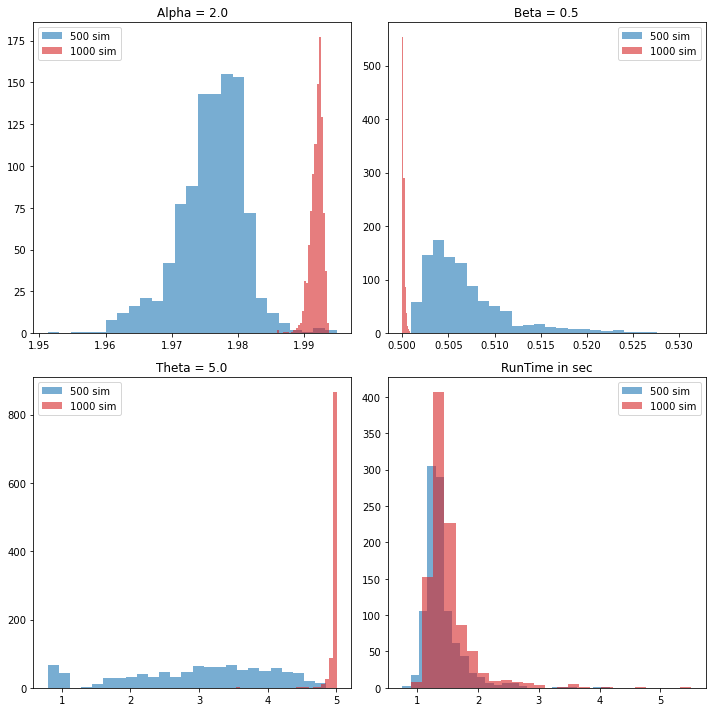

In [43]:
import matplotlib.pyplot as plt
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

ax0.hist(df.Alpha_500.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:blue', label = '500 sim')
ax0.hist(df.Alpha_1000.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:red', label = '1000 sim')
ax0.legend(loc = 'best')
ax0.set_title('Alpha = 2.0')

ax1.hist(df.Beta_500.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:blue', label = '500 sim')
ax1.hist(df.Beta_1000.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:red', label = '1000 sim')
ax1.legend(loc = 'best')
ax1.set_title('Beta = 0.5')

ax2.hist(df.Theta_500.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:blue', label = '500 sim')
ax2.hist(df.Theta_1000.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:red', label = '1000 sim')
ax2.legend(loc = 'best')
ax2.set_title('Theta = 5.0')

ax3.hist(df.RunTime_500.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:blue', label = '500 sim')
ax3.hist(df.RunTime_1000.values, 25, histtype = 'bar', alpha = 0.6, color = 'tab:red', label = '1000 sim')
ax3.legend(loc = 'best')
ax3.set_title('RunTime in sec')

fig.tight_layout()

plt.show()